In [1]:
import numpy as np
import scipy as sp
import pandas as pd

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_digits

# Import данных digits

In [2]:
data = load_digits()

df_X = pd.DataFrame(data['data'])
df_Y = pd.Series(data['target'])

df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
print(df_Y.shape)
df_Y.head()

(1797,)


0    0
1    1
2    2
3    3
4    4
dtype: int32

# train_test_split и cross-validation

Создадим простой классификатор для демонстрации - Наивный Байесовский классификатор. 

Также добавим функцию вывода confusion-matrix для демонстрации результатов

In [4]:
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

## train_test_split
Применяется для разделения общей выборки на обучающую (чтобы учиться на ней) и тестовую (чтобы измерять итоговую точность алгоритма классификации)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y,
                                                    test_size=0.33,
                                                    random_state=42)

In [6]:
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
confusion_matrix(y_test, predictions)

array([[53,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0, 35,  2,  0,  0,  2,  1,  3,  9,  3],
       [ 0,  2, 28,  0,  0,  4,  1,  0, 17,  0],
       [ 0,  0,  2, 39,  0,  3,  0,  0,  9,  3],
       [ 1,  0,  0,  0, 54,  0,  2,  7,  0,  0],
       [ 0,  0,  0,  0,  1, 65,  1,  5,  1,  0],
       [ 0,  0,  0,  0,  0,  2, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 61,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  2, 48,  0],
       [ 0,  1,  1,  1,  0,  5,  1,  7,  5, 47]], dtype=int64)

## cross-validation
Применяется для оценки качества алгоритма, чтобы потом их сравнивать. Разбиваем на части (фолды) и прогоняем на каждом разбиении все алгоритмы и замеряем соответствующие значения. Потом их можно сравнить.

In [7]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)

for train_indices, test_indices in k_fold.split(df_X):
    print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train = df_X.loc[train_indices,:]

Train: [ 360  361  362 ... 1794 1795 1796] | test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233


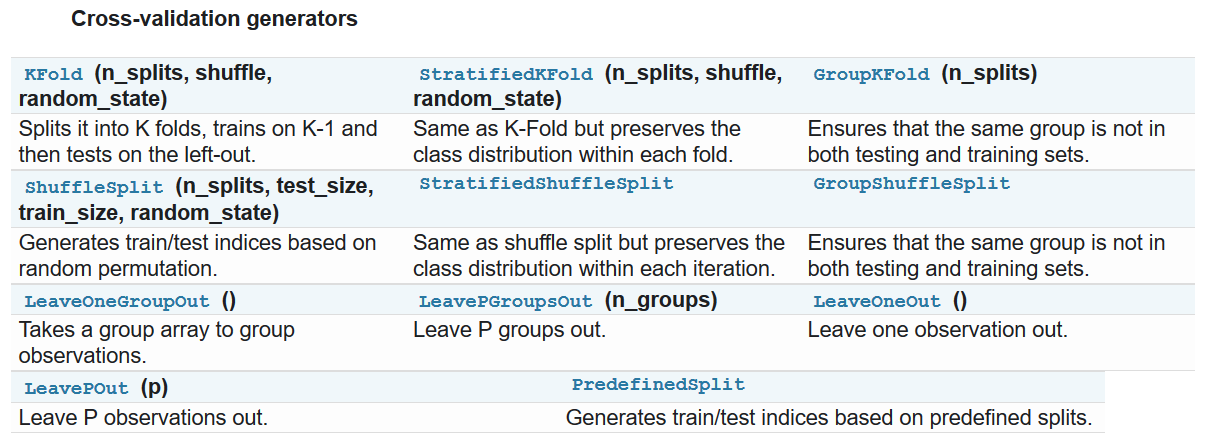

## cross_val_score
Применяется также для оценки качества некоторого алгоритма - выполняет кросс-валидацию и возвращает результаты метрики.

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, df_X, df_Y, cv=5, scoring='f1_macro')
scores

array([0.770751  , 0.78151333, 0.79642338, 0.86697326, 0.80934252])

## GridSearchCV
Ищем в пространстве гиперпараметров (априорные параметры алгоритма) оптимальные значения метрики для одного классификатора, сравнивая на кросс-валидации

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [9]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier # Решающее дерево

# Параметры для DT
params = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [0.1, 0.5, 0.7]
}

gsc = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid=params,
        cv=5,
        scoring='accuracy', 
        verbose=0, 
        n_jobs=-1)

In [10]:
grid_result = gsc.fit(df_X, df_Y)

best_params = grid_result.best_params_
print(best_params)

model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)

print(cross_val_score(model, df_X, df_Y, cv=5, scoring='f1_macro'))

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y,
                                                    test_size=0.33,
                                                    random_state=42)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 1}
[0.76891475 0.80030993 0.83398379 0.84989262 0.79571781]


C:\Program_Files_Special\Python373\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([[52,  0,  0,  0,  1,  0,  0,  0,  1,  1],
       [ 0, 38,  2,  3,  6,  3,  0,  0,  2,  1],
       [ 0,  2, 39,  4,  0,  1,  0,  0,  6,  0],
       [ 0,  2,  3, 42,  1,  3,  1,  0,  1,  3],
       [ 0,  3,  0,  1, 53,  2,  0,  4,  1,  0],
       [ 0,  1,  1,  1,  1, 62,  3,  1,  1,  2],
       [ 0,  0,  0,  0,  1,  2, 54,  0,  0,  0],
       [ 0,  1,  0,  1,  3,  2,  0, 53,  1,  1],
       [ 0,  3,  4,  1,  2,  0,  0,  0, 40,  2],
       [ 0,  1,  0,  1,  1,  3,  0,  0,  0, 62]], dtype=int64)